In [42]:
""" Read the soil solution concentrations (umol/L) from 
Hubbard Brook watershed 1 """
import xarray as xr
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv("../data/Hubbard Brook/knb-lter-hbr.138.11/W1Lysim_HB1996-2020.csv",
                   index_col = [0, 3, 2], parse_dates=True)
data = data[['pH','Ca2+', 'Mg2+', 'Na+', 'K+', 'Alt']].sort_index() # 'Elevation',
data[data < 0] = np.nan

# some sites have measurements at two elevations, average them
duplicate_sites = data.index[data.index.to_frame().reset_index(drop = True).duplicated()]

temp = data.loc[duplicate_sites, :]
temp = temp.groupby(temp.index).mean()
temp.index = pd.MultiIndex.from_tuples(temp.index, names = ['Site', 'Date'])
data.loc[temp.index, :] = temp

data = data.drop_duplicates()

# average over all the sites in a watershed
data = data.groupby(data.index.get_level_values(0)).mean()

# limit to pre-application
# data = data.loc[data.index.get_level_values(0) < pd.Timestamp('2001-01-30'), :]

cation_mass = {'Ca2+': 40.078, 'Mg2+': 24.305, 'Na+': 22.99, 'K+': 39.0983, 'Alt': 26.98}
for col in cation_mass.keys():
    data[col] = data[col] * cation_mass[col] / 1e3 # 1e-6 mol/L => g/m^3

C:\Users\ywo\AppData\Local\Temp\ipykernel_19188\574516676.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("../data/Hubbard Brook/knb-lter-hbr.138.11/W1Lysim_HB1996-2020.csv",
C:\Users\ywo\AppData\Local\Temp\ipykernel_19188\574516676.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("../data/Hubbard Brook/knb-lter-hbr.138.11/W1Lysim_HB1996-2020.csv",


Text(0, 0.5, 'g/m3 soil pore water')

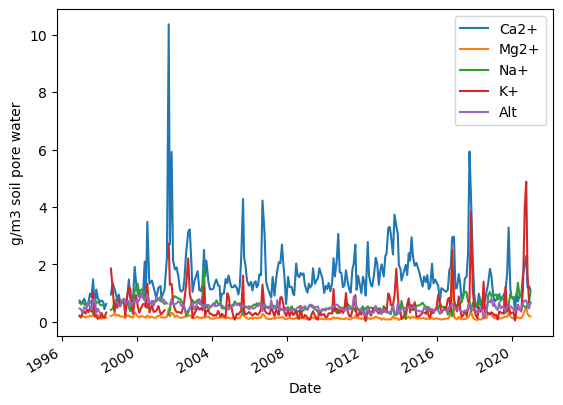

: 

In [44]:
data.drop('pH', axis = 1).plot()
plt.ylabel('g/m3 soil pore water')